#multinomial LogisticRegression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

body['gender'] = np.where(body['gender']=='M', 0, 1)
mapping = {'A': 0, 'B':1, 'C':2, 'D':4}
body['class_2'] = body['class'].map(mapping)
body

,Unnamed: 0,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1,class_2
0,0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,2
1,1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1,0
2,2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,2
3,3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0,2
13389,13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0,4
13390,13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1,0
13391,13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0,4


In [ ]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, stratify = y, random_state = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 13) (4018, 13) (9375,) (4018,)


###multi_class='multinomial': 이 매개변수는 모델이 다중 클래스 문제를 어떻게 처리할지 결정. 'multinomial' 옵션은 소프트맥스 회귀(Softmax Regression)를 사용하여 여러 클래스를 예측할 때 각 클래스에 속할 확률을 계산. 이는 세 개 이상의 클래스가 있는 분류 문제에 적합.

###solver='lbfgs': 이 매개변수는 최적화 문제를 해결하기 위한 알고리즘을 지정. 'lbfgs'는 제한된 메모리를 사용하는 BFGS 알고리즘(L-BFGS)의 변형으로, 중대형 데이터셋에 적합하며 다중 클래스 문제와 L2 규제에 잘 작동.

###C=10: 로지스틱 회귀에서 C 매개변수는 규제의 강도를 제어. C 값이 클수록 규제가 약해지고, 작을수록 규제가 강해짐. 규제는 과적합을 방지하는 데 도움이 됩니다. C=10은 상대적으로 약한 규제를 의미.

In [ ]:
from sklearn.linear_model import LogisticRegression

softm = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C= 10, random_state = 45)
softm.fit(x_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=45)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

pred = softm.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_re = recall_score(y_test, pred, average='macro')
test_f1 = f1_score(y_test, pred, average='macro')

print(test_cm)
print()
print('정확도 {}'.format(round(test_acc*100, 2)))
print('재현율 {}'.format(round(test_re*100, 2)))
print('F1 {}'.format(round(test_f1*100, 2)))


[[661 244  94   5]
 [390 244 311  59]
 [184 140 492 189]
 [ 22  41 206 736]]

정확도 53.09
재현율 53.08
F1 52.03


In [ ]:
softm.predict([x_test.iloc[-1, :]])

array([0])

In [ ]:
softm.predict_proba([x_test.iloc[-1, :]])

array([[0.48791688, 0.32071386, 0.1610604 , 0.03030886]])

In [ ]:
print(y.shape)

(13393,)


(4018, 4) (4018, 4)


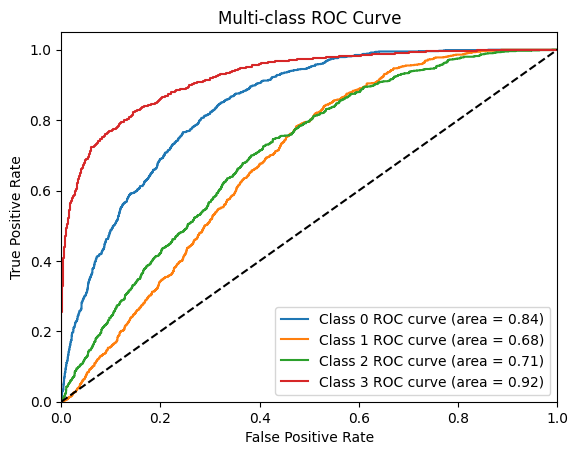

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score = softm.predict_proba(x_test) #확률이 저장됨
# 라벨을 이진 형태로 변환
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 4])
print(y_score.shape, y_test_bin.shape)
# ROC 커브 및 AUC 계산
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1] #classes=[0, 1, 2, 4]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC 커브 그리기
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()